In [1]:
from matplotlib import pyplot as plt
import argparse
import cv2
import numpy as np


In [7]:
import warnings
warnings.filterwarnings("ignore")

In [13]:
def take_roi(path_to_img):
    img = cv2.imread(path_to_img,0)
    bbox = cv2.selectROI(img, False)
    x, y, w, h = bbox[0], bbox[1], bbox[2], bbox[3]
    roi = img[y: y+h,x:x+w]
    return roi

In [28]:
path = "img0000030.jpg"
img = cv2.imread(path)
roi = take_roi(path)
cv2.destroyAllWindows()

(0.0, 300.0)

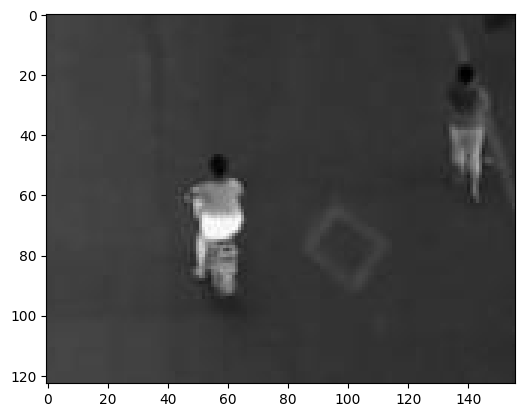

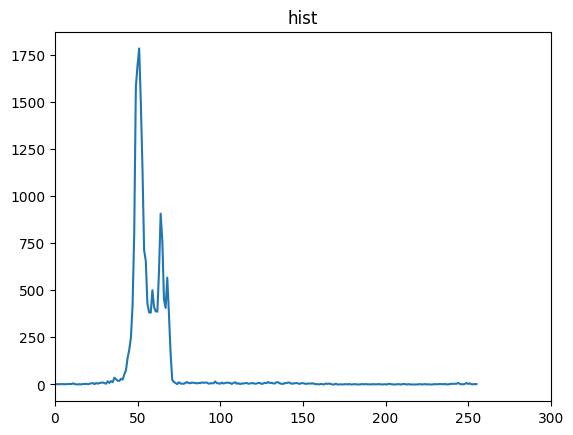

In [29]:
hist = cv2.calcHist([roi], [0], roi, [256], [0, 256])
plt.figure()
plt.imshow(cv2.cvtColor(roi, cv2.COLOR_GRAY2BGR))
plt.figure()
plt.plot(hist)
plt.title("hist")
plt.xlim([0,300])

(0.0, 300.0)

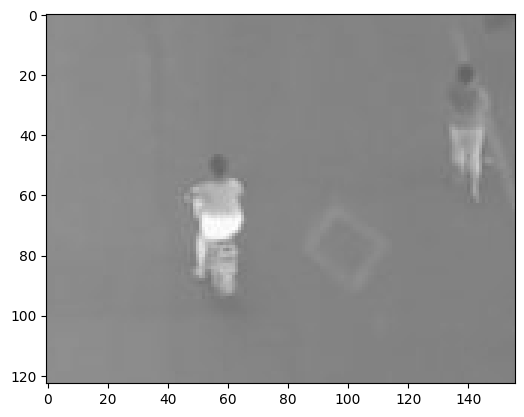

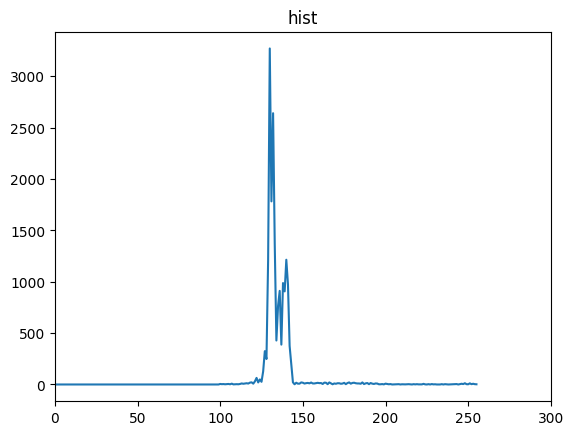

In [30]:
# Normalize the grayscale image
normalized = cv2.normalize(roi, None, 100, 255, cv2.NORM_MINMAX)
plt.figure()
plt.imshow(cv2.cvtColor(normalized, cv2.COLOR_GRAY2BGR))
hist = cv2.calcHist([normalized], [0], normalized, [256], [0, 256])
plt.figure()
plt.plot(hist)
plt.title("hist")
plt.xlim([0,300])

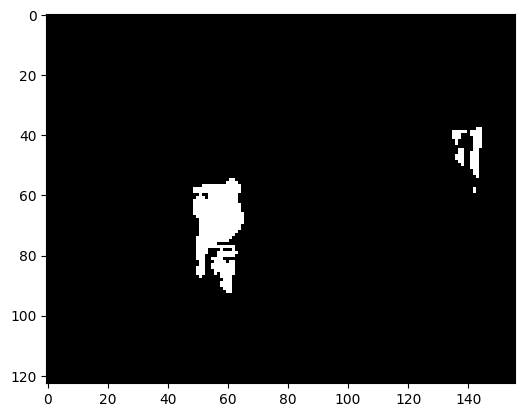

In [31]:

# Apply a threshold to the normalized image
_, threshold = cv2.threshold(normalized, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.figure()
plt.imshow(cv2.cvtColor(threshold, cv2.COLOR_GRAY2BGR))

In [21]:
# Find the contours in the binary mask
contours, hierarchy = cv2.findContours(threshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Find the bounding box around the largest contour
largest_contour = max(contours, key=cv2.contourArea)
x,y,w,h = cv2.boundingRect(largest_contour)
print(x, y, w, h)
# Draw a rectangle around the largest contour
cv2.rectangle(threshold,(x,y),(x+w,y+h),(0,255,0),2)

# Display the image with the rectangle drawn around the segmented region
cv2.imshow('Contours', threshold)
cv2.waitKey(0)
cv2.destroyAllWindows()

58 69 5 13
